<a href="https://www.kaggle.com/code/mlinks/diabeates-disease-prediction?scriptVersionId=244252749" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Healthcare – Early Detection of Diabetes Using Machine Learning

## Background

A mobile health clinic aims to pre-screen patients for diabetes using basic health indicators like glucose level, BMI, insulin levels, and age. The goal is to:

1. Reduce hospital crowding,
2. Prioritize care for at-risk individuals,
3. Enable early intervention to prevent complications.

## Problem statement

Many people remain undiagnosed or are diagnosed too late with diabetes, especially Type 2 Diabetes. Traditional screening methods are resource-intensive. There is a need to:

* Predict the likelihood of diabetes before formal testing
* Use machine learning (ML) to classify whether a person is likely diabetic based on easily measurable indicators.

## Objective

To build a classification model that predicts whether a person has diabetes or not, based on features such as BMI, glucose level, insulin level, age, and others from the Pima Indians Diabetes dataset.

## Preparing the environment



In [71]:
## Import all necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier #Added for a more robust model option
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')



In [72]:
## importing the dataset
df = pd.read_csv("/kaggle/input/pima-indians-diabetes-database/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [73]:
# Extract columns as a data frame.

cols = df.columns
columns = pd.DataFrame(cols, columns=['Column Names'])
columns

,Column Names
0,Pregnancies
1,Glucose
2,BloodPressure
3,SkinThickness
4,Insulin
5,BMI
6,DiabetesPedigreeFunction
7,Age
8,Outcome


## Description of the columns

| Column Name              | Description                                                      |
| ------------------------ | ---------------------------------------------------------------- |
| Pregnancies              | Number of times pregnant                                         |
| Glucose                  | Plasma glucose concentration                                     |
| BloodPressure            | Diastolic blood pressure (mm Hg)                                 |
| SkinThickness            | Triceps skinfold thickness (mm)                                  |
| Insulin                  | 2-Hour serum insulin (mu U/ml)                                   |
| BMI                      | Body mass index (weight in kg/m²)                                |
| DiabetesPedigreeFunction | Function that scores diabetes likelihood based on family history |
| Age                      | Age in years                                                     |
| Outcome                  | Class variable (0: Non-diabetic, 1: Diabetic)                    |

## Data cleaning and preprocessing.

In [74]:
df.shape

(768, 9)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [76]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [77]:
## Check for null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [78]:
df.duplicated().sum()

0

The Data has no duplicates, neither does it have null values. 

In [79]:
# The dataset description mentions that 0 can be a placeholder for missing values in certain columns.
# Columns where 0 might indicate a missing value: 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'
cols_to_check_for_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
print(f"Counts of zeros in columns {cols_to_check_for_zeros}:")
for col in cols_to_check_for_zeros:
    zero_count = (df[col] == 0).sum()
    print(f"- {col}: {zero_count} zeros ({(zero_count/len(df)*100):.2f}%)") # checking for the number of zeros and percentages

Counts of zeros in columns ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
- Glucose: 5 zeros (0.65%)
- BloodPressure: 35 zeros (4.56%)
- SkinThickness: 227 zeros (29.56%)
- Insulin: 374 zeros (48.70%)
- BMI: 11 zeros (1.43%)


### Data Quality Insight: Implausible Zero Values

In the dataset, the following medical features contain zero values:

- `Glucose`
- `BloodPressure`
- `SkinThickness`
- `Insulin`
- `BMI`

These physiological measurements are **always expected to have non-zero values** in any living individual. 

Therefore, zero entries in these columns are likely due to **missing data or incorrect recording** rather than actual valid observations.

> **Note:** These zeros should be treated as missing values during data preprocessing.



In [80]:
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']
df[zero_cols] = df[zero_cols].replace(0, np.nan)
df = pd.DataFrame(SimpleImputer(strategy='median').fit_transform(df), columns=df.columns)

Zero values in key health columns are replaced with NaN to mark them as missing.  
Missing values are then filled using the median value of each column with SimpleImputer.

## Exloratory Data Analysis.

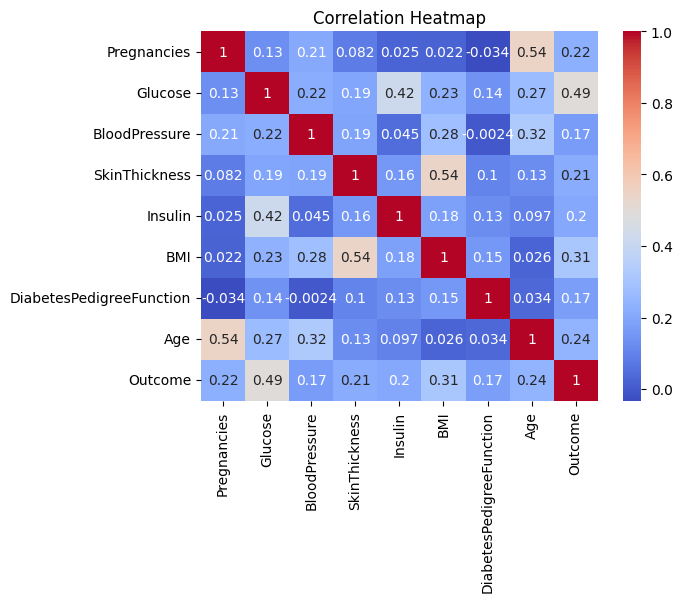

In [81]:
# Checking for correlation
df_corr = df.corr()

sns.heatmap(df_corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig("Correlation Heatmap")
plt.show()

###  Key Correlations from the Heatmap

The heatmap highlights the strength of linear relationships between features and the target variable `Outcome`.

#### Most Important Correlations:

- **Glucose ↔ Outcome (0.47)**  
  Strongest positive correlation. Higher glucose levels are clearly associated with a higher likelihood of the condition.

- **BMI ↔ Outcome (0.29)**  
  Moderate correlation. Indicates that higher body mass index contributes to the risk.

- **Age ↔ Outcome (0.24)**  
  Older individuals show a higher tendency toward the outcome.

- **Pregnancies ↔ Outcome (0.22)**  
  Suggests that more pregnancies are modestly linked with the condition, possibly due to long-term health effects.

#### ⚠️ Note:
Other features like `Insulin`, `BloodPressure`, and `SkinThickness` have weak correlations with the outcome.


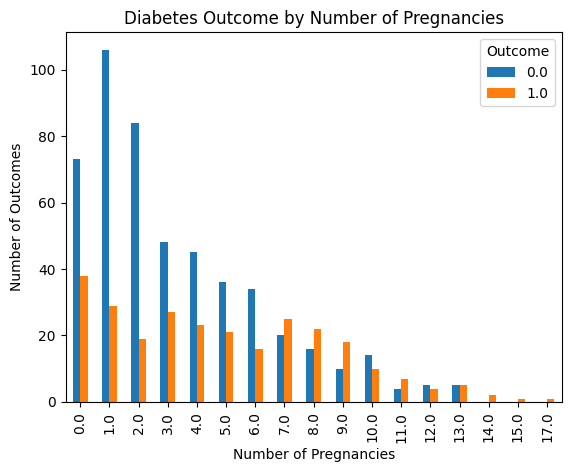

In [82]:
# Checking to see if there is a relationship between number of pregnancy and likelihood of being diagnosed with diabetes
df.groupby("Pregnancies")["Outcome"].value_counts().unstack().plot(kind="bar", stacked=False)
plt.title("Diabetes Outcome by Number of Pregnancies")
plt.xlabel("Number of Pregnancies")
plt.ylabel("Number of Outcomes");
plt.savefig("Bargraph")

### Diabetes Outcome by Number of Pregnancies

- Fewer pregnancies (0–2) are associated with more non-diabetic cases.
- As the number of pregnancies increases, the proportion of diabetic cases (orange bars) also increases.
- Diabetic outcomes become more frequent relative to non-diabetic outcomes in women with 6 or more pregnancies.

> **Conclusion:** Higher pregnancy count is associated with a higher likelihood of diabetes.


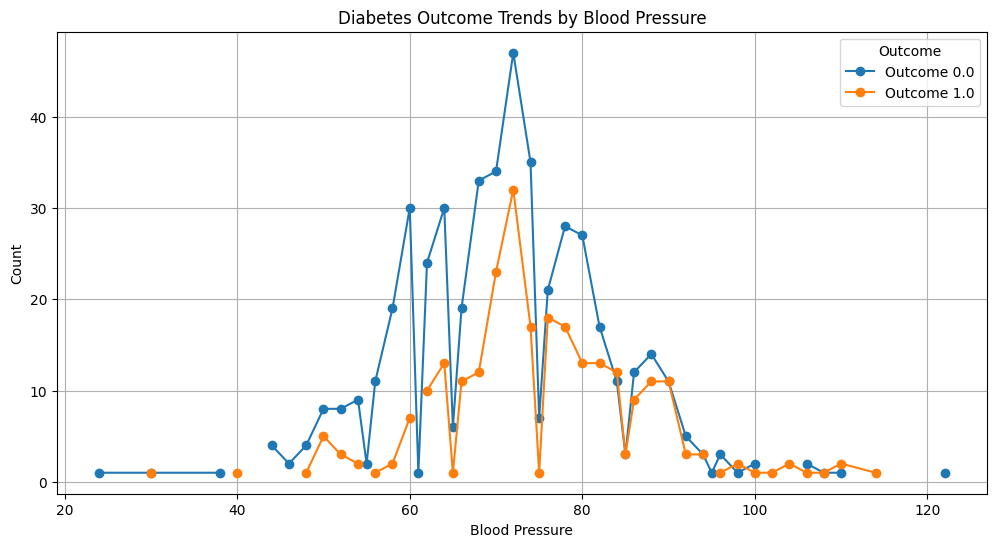

In [83]:
# Group the data
grouped = df.groupby("BloodPressure")["Outcome"].value_counts().unstack()

# Plot line chart
plt.figure(figsize=(12, 6))
for outcome in grouped.columns:
    plt.plot(grouped.index, grouped[outcome], marker='o', label=f'Outcome {outcome}')

# Add labels and title
plt.title("Diabetes Outcome Trends by Blood Pressure")
plt.xlabel("Blood Pressure")
plt.ylabel("Count")
plt.legend(title='Outcome')
plt.grid(True)
plt.savefig("LineGraph")
plt.show()


## Blood Pressure & Diabetes
- **Non-diabetics (Outcome 0):** Most have diastolic blood pressure between 60–80 mmHg, with a sharp, high peak—indicating normal, stable blood pressure.
- **Diabetics (Outcome 1):** Show a wider, flatter distribution; more diabetics have higher blood pressure (>80 mmHg).
- **Clinical Relevance:** Diabetes is linked to greater blood pressure variability and more cases of elevated blood pressure, increasing risk for cardiovascular complications.
- **Key Takeaway:** Blood pressure monitoring and control are crucial in diabetes management to reduce health risks.

<Figure size 1000x600 with 0 Axes>

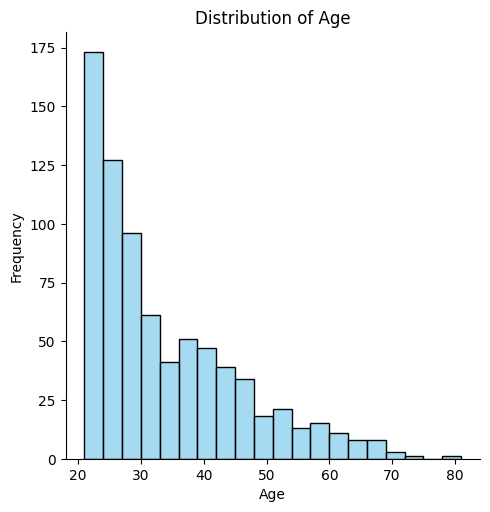

In [84]:
# Check for the age distribution
plt.figure(figsize=(10, 6))
sns.displot(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig("age distribution")
plt.show();

## Age Distribution Explanation

- **Shape:** The histogram shows a right-skewed (positively skewed) distribution.
- **Peak:** The largest group is in the early 20s, with the highest frequency around age 21–23.
- **Trend:** As age increases, the number of individuals decreases steadily.
- **Older Age Groups:** There are very few individuals above age 60, and almost none above 75.

### Summary

Most individuals in this data set are young adults, with frequency dropping sharply as age increases. The population is concentrated in the 20–40 year age range, and older adults are underrepresented.

In [85]:
# Checking if the data is balanced
df['Outcome'].value_counts()

Outcome
0.0    500
1.0    268
Name: count, dtype: int64

- We have an imbalance dataset and Machine learning models trained on imbalanced data may become biased toward the majority class. This needs to be tackled!

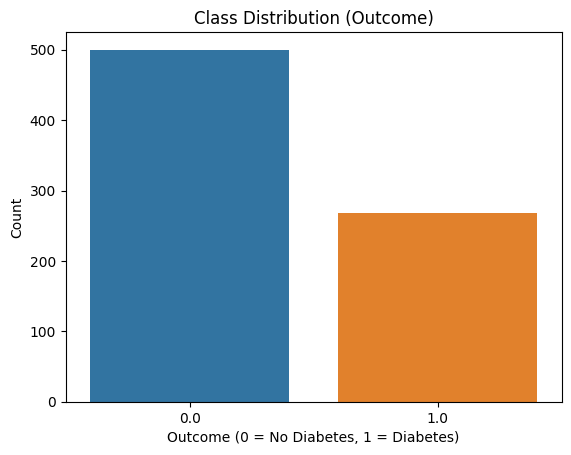

In [86]:
# Visualize the imbalance
sns.countplot(x='Outcome', data=df)
plt.title('Class Distribution (Outcome)')
plt.xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('Count')
plt.show()

In [87]:
# Function to resample(Oversample the minority class)

def balance_dataset(df, target_column):
    """
    Balance the dataset by oversampling the minority class

    """
    # Separate majority and minority classes
    majority = df[df[target_column] == 0]
    minority = df[df[target_column] == 1]

    print(f"Before Oversampling:\n{df[target_column].value_counts()}\n")

    # Upsample minority class
    minority_upsampled = resample(
        minority,
        replace=True,  # sample with replacement
        n_samples=len(majority),  # match majority count
        random_state=42
    )

    # Combine majority and upsampled minority
    df_oversampled = pd.concat([majority, minority_upsampled])

    print(f"After Oversampling:\n{df_oversampled[target_column].value_counts()}\n")

    # Plot class distribution before and after
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    df[target_column].value_counts().plot(kind='bar', ax=axes[0], color=['skyblue', 'orange'])
    axes[0].set_title('Before Oversampling')
    axes[0].set_xlabel('Class')
    axes[0].set_ylabel('Count')

    df_oversampled[target_column].value_counts().plot(kind='bar', ax=axes[1], color=['skyblue', 'orange'])
    axes[1].set_title('After Oversampling')
    axes[1].set_xlabel('Class')
    axes[1].set_ylabel('Count')

    plt.tight_layout()
    plt.savefig("Resampling")
    plt.show()

    return df_oversampled

Before Oversampling:
Outcome
0.0    500
1.0    268
Name: count, dtype: int64

After Oversampling:
Outcome
0.0    500
1.0    500
Name: count, dtype: int64



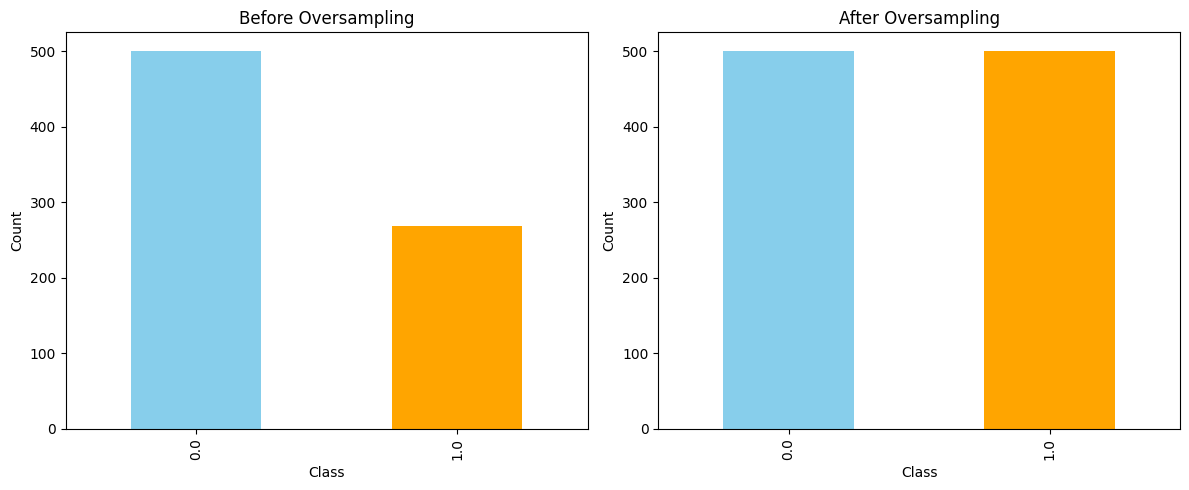

In [88]:
Unbalanced_data = df.copy()
balanced_data = balance_dataset(Unbalanced_data, 'Outcome')

## Feature Selection and feature engineering

From the heatmap above we can see that the Outcome (whether a patient has diabetes or not) is not reaaly affected by the skinThickness and Blood pressure. This can further be confirmed by doing a simple Feature Contribution Analysis. To proceed we need to ensure that all the zeros in the columns of Insulin, BloodPressure, Glucose, SkinThickness, BMI have been replaced with the median of their respective columns.

In [89]:
Unbalanced_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [90]:
balanced_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,4.191000,124.891000,73.304000,29.64100,146.179000,32.811800,0.476622,34.273000,0.50000
std,3.566685,29.715857,11.970751,8.32631,87.909767,6.765073,0.327363,11.623751,0.50025
min,0.000000,44.000000,24.000000,7.00000,14.000000,18.200000,0.078000,21.000000,0.00000
25%,1.000000,103.000000,66.000000,27.00000,125.000000,28.000000,0.246750,25.000000,0.00000
50%,3.000000,122.000000,72.000000,29.00000,125.000000,32.400000,0.370000,31.000000,0.50000
75%,7.000000,144.000000,80.000000,33.00000,140.000000,36.600000,0.645250,42.000000,1.00000
max,17.000000,199.000000,122.000000,63.00000,744.000000,67.100000,2.420000,81.000000,1.00000


In [91]:
## Create a copy of the balanced DataSet
copy_balanced = balanced_data.copy()

In [92]:
copy_balanced.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,4.191000,124.891000,73.304000,29.64100,146.179000,32.811800,0.476622,34.273000,0.50000
std,3.566685,29.715857,11.970751,8.32631,87.909767,6.765073,0.327363,11.623751,0.50025
min,0.000000,44.000000,24.000000,7.00000,14.000000,18.200000,0.078000,21.000000,0.00000
25%,1.000000,103.000000,66.000000,27.00000,125.000000,28.000000,0.246750,25.000000,0.00000
50%,3.000000,122.000000,72.000000,29.00000,125.000000,32.400000,0.370000,31.000000,0.50000
75%,7.000000,144.000000,80.000000,33.00000,140.000000,36.600000,0.645250,42.000000,1.00000
max,17.000000,199.000000,122.000000,63.00000,744.000000,67.100000,2.420000,81.000000,1.00000


The affected columns have now been filled with the medians of their respective columns.

## Feature Contribution Analysis

To carry out a feature contrinution analysis, it is necessary to extract the outcome from the other features and then fit it using Random Forest Classifier, After that features can then be arranged based on their importance.


In [93]:
X_FeatureAnalysis = copy_balanced.drop(['Outcome'], axis=1)
y_FeatureAnalysis = copy_balanced['Outcome']
X_FeatureAnalysis.shape, y_FeatureAnalysis.shape

((1000, 8), (1000,))

In [94]:
## Model for feature analysis

model_FeatureAnalysis = RandomForestClassifier(n_estimators = 100, random_state=42)
model_FeatureAnalysis.fit(X_FeatureAnalysis, y_FeatureAnalysis)

RandomForestClassifier(random_state=42)

In [95]:
Importances = model_FeatureAnalysis.feature_importances_   # This gets feature importance
feature_importances = pd.DataFrame({'features': X_FeatureAnalysis.columns, 'importance':Importances}) # This creates a Dataframe of features and their importances
feature_importances = feature_importances.sort_values(by='importance', ascending = False)
feature_importances

,features,importance
1,Glucose,0.253889
5,BMI,0.161215
7,Age,0.144673
6,DiabetesPedigreeFunction,0.105436
2,BloodPressure,0.090586
4,Insulin,0.087421
0,Pregnancies,0.081948
3,SkinThickness,0.074832


## Feature Importance

Glucose, BMI, and Age are the most important features for predicting diabetes, with Glucose having the highest influence, followed by BMI and Age.

Further, Insulin and Pregnacies cannot be dropped because of their importance in influencing the diabetic conditions of patients, the appearance of insulin as one of the least contributors could be traced to the exceesively high zero it had in the original dataset.

BloodPressure and SkinThickness do not really play an important role in predicting diabetes. DiabetesPedigreeFunction has been found to have moderate diagnostic value. However, before the features are dropped, it is necessary to create additional features that will help our model to do better, Through a process generally referred to as Feature Engineering.
 ##  Feature Engineering
Two additional features will be created:  
1. Glucose and Insulin Interaction: the significance of this feature is a key factor in diabetes. High Glucose levels combined with High Insulin often indicates insulin resistance, which is a major precursor to diabetes.  
2. BMI-Age Composite feature: This feature models the compounded risk of obesity with aging, this captures non-linear effects better than individual features.  

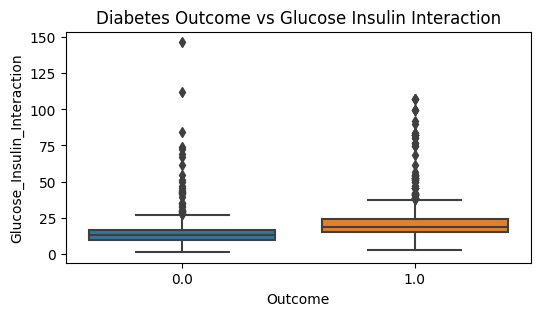

In [96]:
copy_balanced['Glucose_Insulin_Interaction'] = copy_balanced['Glucose']*copy_balanced['Insulin']/1000
# How this new feature relates with the outcome can be visualised as shown below
plt.figure(figsize=(6, 3))
sns.boxplot(x="Outcome", y="Glucose_Insulin_Interaction", data=copy_balanced)
plt.title("Diabetes Outcome vs Glucose Insulin Interaction")
plt.show()

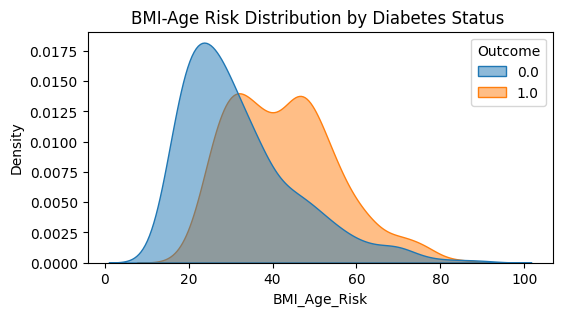

In [97]:
# Similarly, 
copy_balanced['BMI_Age_Risk'] = copy_balanced['BMI']*(copy_balanced['Age']/30)
plt.figure(figsize=(6, 3))
sns.kdeplot(x="BMI_Age_Risk", hue='Outcome', data=copy_balanced, alpha=0.5, fill = True)
plt.title("BMI-Age Risk Distribution by Diabetes Status ")
plt.show()

In [98]:
# The two newly created features also rank high in the feature importance ranking as shown below
X_FeatureAnalysis1 = copy_balanced.drop(['Outcome'], axis=1)
y_FeatureAnalysis1 = copy_balanced['Outcome']
model_FeatureAnalysis = RandomForestClassifier(n_estimators = 100, random_state=42)
model_FeatureAnalysis.fit(X_FeatureAnalysis1, y_FeatureAnalysis1)

RandomForestClassifier(random_state=42)

In [99]:
Importances = model_FeatureAnalysis.feature_importances_   # This gets feature importance
feature_importances = pd.DataFrame({'features': X_FeatureAnalysis1.columns, 'importance':Importances}) # This creates a Dataframe of features and their importances
feature_importances = feature_importances.sort_values(by='importance', ascending = False)
feature_importances

,features,importance
1,Glucose,0.168395
8,Glucose_Insulin_Interaction,0.158024
9,BMI_Age_Risk,0.156195
5,BMI,0.115738
7,Age,0.094566
6,DiabetesPedigreeFunction,0.079859
2,BloodPressure,0.065520
0,Pregnancies,0.056767
3,SkinThickness,0.053331
4,Insulin,0.051606


## Compare feature importance After and Before feature Engineering.

After feature engineering, the model relies more on new interaction features (like Glucose_Insulin_Interaction and BMI_Age_Risk), indicating it now captures more complex relationships between variables for better diabetes prediction.

In [100]:
copy_balanced.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_Insulin_Interaction,BMI_Age_Risk
1,1.0,85.0,66.0,29.0,125.0,26.6,0.351,31.0,0.0,10.625,27.486667
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0,8.366,19.670000
5,5.0,116.0,74.0,29.0,125.0,25.6,0.201,30.0,0.0,14.500,25.600000
7,10.0,115.0,72.0,29.0,125.0,35.3,0.134,29.0,0.0,14.375,34.123333
10,4.0,110.0,92.0,29.0,125.0,37.6,0.191,30.0,0.0,13.750,37.600000


## Model Training.

- Three alogorithims will be used (Logistic regression, randomForest classifier and XGBclassifier) then the best performing model selected.

**Before then data will be devided to a train and test set.**

In [101]:
# 1. Select X (features) and y (target) from the DataFrame 'copy_balanced'

x = copy_balanced.drop('Outcome', axis=1)  # X contains all columns except the target
y = copy_balanced['Outcome']

# Here, test_size=0.2 means 20% test data, 80% train data. Set random_state for reproducibility.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [102]:
x_train.shape, x_test.shape

((800, 10), (200, 10))

In [103]:
y_train.shape, y_test.shape

((800,), (200,))

## 1. Logistic Regression Model

In [104]:
# Initialize the logistic regression model
log_model = LogisticRegression(max_iter =1000, random_state=42)

# Train the model on the training data
log_model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [105]:
# Predict labels for the test set
Log_ypredict = logreg.predict(x_test)
Log_ypredict

NameError: name 'logreg' is not defined

In [ ]:
# Evaluate the model
# Get accuracy
accuracy = accuracy_score(y_test, Log_ypredict)

# Get classification report 
report = classification_report(y_test, Log_ypredict, output_dict=True)

# Convert classification report to DataFrame
C_Report  = pd.DataFrame(report).transpose()

# Add accuracy as a new row
C_Report.loc['accuracy'] = [accuracy, None, None, None]
## Print Report
C_Report

In [ ]:
# Logistic Regression confusion matrix
log_cm = confusion_matrix(y_test, Log_ypredict)
plt.figure(figsize=(5,4))
sns.heatmap(log_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig("Logistic Regression Matrix")
plt.show()

## 2. Random Forest Tree Model

In [ ]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

# Predict on the test set
rf_ypredict = rf_model.predict(x_test)

# Calculate accuracy
rf_accuracy = accuracy_score(y_test, rf_ypredict)

# Get classification report
rf_report = classification_report(y_test, rf_ypredict, output_dict=True)
RF_report = pd.DataFrame(rf_report).transpose()

# Add accuracy to the table
RF_report.loc['accuracy'] = [rf_accuracy, None, None, None]

# Display the evaluation table
RF_report

In [ ]:
# Random Forest confusion matrix
rf_cm = confusion_matrix(y_test, rf_ypredict)
plt.figure(figsize=(5,4))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Greens')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig("RF Model")
plt.show()

## 3. XGBClassification Model

In [ ]:
#Initialize and train the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(x_train, y_train)

#Predict on the test set
xgb_ypredict = xgb_model.predict(x_test)

#Calculate accuracy
xgb_accuracy = accuracy_score(y_test, xgb_ypredict)

# Get classification report
report = classification_report(y_test, xgb_ypredict, output_dict=True)
xgb_report = pd.DataFrame(report).transpose()

# Add accuracy to the table
xgb_report.loc['accuracy'] = [xgb_accuracy, None, None, None]

# Display the evaluation table
xgb_report

In [ ]:
# Begion ny computing the confusion matrix
xgb_cm = confusion_matrix(y_test, xgb_ypredict)

# Plot the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='Oranges')
plt.title('XGBoost Classifier Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig("XGBC matrix")
plt.show()

In [ ]:
import joblib
joblib.dump(xgb_model, 'xgb_model.pkl')

In [ ]:
joblib.dump(log_model,'log_model.pkl')

In [ ]:
joblib.dump(rf_model, 'Randon_Model.pkl')